In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

# Import data (Make sure to parse dates. Consider setting index column to 'date'.)
df = pd.read_csv('fcc-forum-pageviews', parse_dates=['date'], index_col='date') 

# Clean data
df = df[~((df['value'] > df['value'].quantile(0.975)) | (df['value'] < df['value'].quantile(0.025)))]


def draw_line_plot(df):
    # Draw line plot
    fig, ax = plt.subplots(figsize = (10, 5))
    ax.plot(df.index, df['value'])
    ax.set_title("Daily freeCodeCamp Forum Page Views 5/2016-12/2019")
    ax.set_xlabel("Date")
    ax.set_ylabel("Page Views")

    # Save image and return fig (don't change this part)
    fig.savefig('line_plot.png')
    return fig

def draw_bar_plot():
    # Copy and modify data for monthly bar plot
    df_bar = None

    # Draw bar plot





    # Save image and return fig (don't change this part)
    fig.savefig('bar_plot.png')
    return fig

def draw_box_plot():
    # Prepare data for box plots (this part is done!)
    df_box = df.copy()
    df_box.reset_index(inplace=True)
    df_box['year'] = [d.year for d in df_box.date]
    df_box['month'] = [d.strftime('%b') for d in df_box.date]

    # Draw box plots (using Seaborn)





    # Save image and return fig (don't change this part)
    fig.savefig('box_plot.png')
    return fig

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

In [2]:
# Import data (Make sure to parse dates. Consider setting index column to 'date'.)
df = pd.read_csv('fcc-forum-pageviews.csv', parse_dates=['date'], index_col='date') 

In [3]:
# Clean data
df = df[~((df['value'] > df['value'].quantile(0.975)) | (df['value'] < df['value'].quantile(0.025)))]

In [4]:
def draw_line_plot(df):
    fig, ax = plt.subplots(figsize = (10, 5))
    ax.plot(df.index, df['value'])
    ax.set_title("Daily freeCodeCamp Forum Page Views 5/2016-12/2019")
    ax.set_xlabel("Date")
    ax.set_ylabel("Page Views")
    fig.savefig('line_plot.png')
    return fig

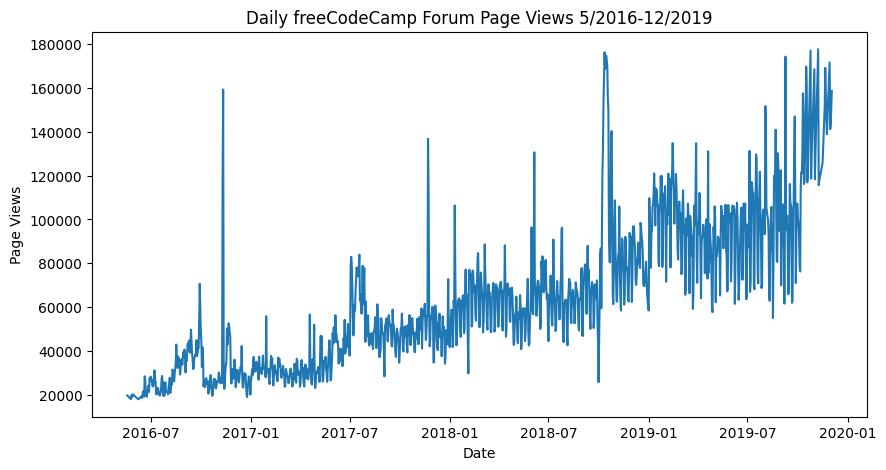

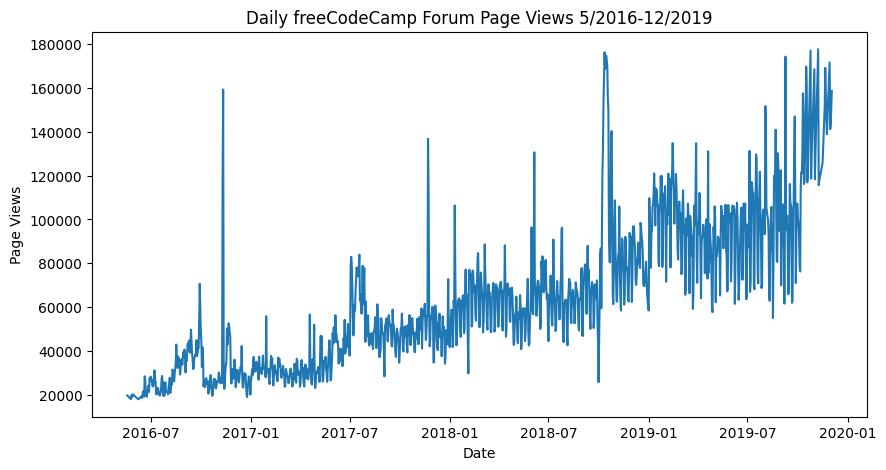

In [5]:
draw_line_plot(df)

In [6]:
def draw_bar_plot():
    # Copy and modify data for monthly bar plot
    df_bar = df.copy()
    df_bar = df_bar.resample('M').mean()
    df_bar['Months'] = df_bar.index.strftime('%B')

    # Draw bar plot




    # Save image and return fig (don't change this part)
    #fig.savefig('bar_plot.png')
    #return fig

In [21]:
df_bar = df.copy()

In [22]:
df_bar = df_bar.resample('M').mean()

In [23]:
df_bar = df_bar.rename(columns = {'value' : 'Average Page Views'})

In [24]:
df_bar['Months'] = df_bar.index.strftime('%B')

In [25]:
df_bar['Year'] = df_bar.index.strftime('%Y')

In [26]:
df_bar.head()

,Average Page Views,Months,Year
date,,,
2016-05-31,19432.400000,May,2016
2016-06-30,21875.105263,June,2016
2016-07-31,24109.678571,July,2016
2016-08-31,31049.193548,August,2016
2016-09-30,41476.866667,September,2016


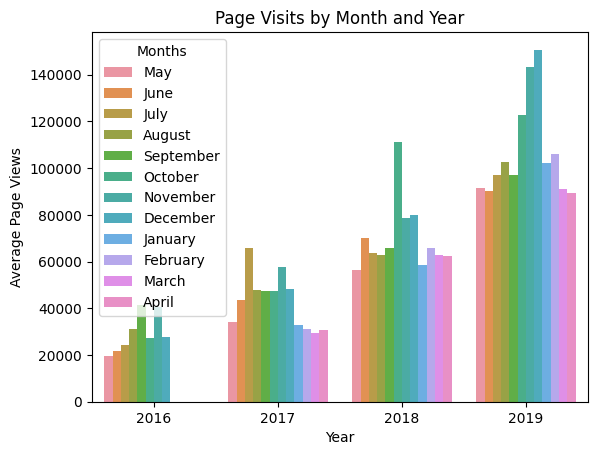

In [29]:
sns.barplot(x='Year', y='Average Page Views', hue='Months', data=df_bar)
plt.xlabel('Year')
plt.ylabel('Average Page Views')
plt.title('Page Visits by Month and Year')
plt.show()